In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm
import itertools

In [8]:
# Load data from CSV
aaa_data = pd.read_csv('D:\\Github anyud\\final\\Data_stock\\AAA Historical Data.csv', parse_dates=['Date'], index_col='Date')
aapl_data = pd.read_csv('D:\\Github anyud\\final\\Data_stock\\AAPL Historical Data.csv', parse_dates=['Date'], index_col='Date')
acb_data = pd.read_csv('D:\\Github anyud\\final\\Data_stock\\ACB Historical Data.csv', parse_dates=['Date'], index_col='Date')
bid_data = pd.read_csv('D:\\Github anyud\\final\\Data_stock\\BID Historical Data.csv', parse_dates=['Date'], index_col='Date')
ctg_data = pd.read_csv('D:\\Github anyud\\final\\Data_stock\\CTG Historical Data.csv', parse_dates=['Date'], index_col='Date')
fpt_data = pd.read_csv('D:\\Github anyud\\final\\Data_stock\\FPT Historical Data.csv', parse_dates=['Date'], index_col='Date')
gas_data = pd.read_csv('D:\\Github anyud\\final\\Data_stock\\GAS Historical Data.csv', parse_dates=['Date'], index_col='Date')
nvda_data = pd.read_csv('D:\\Github anyud\\final\\Data_stock\\NVDA Historical Data.csv', parse_dates=['Date'], index_col='Date')
vcb_data = pd.read_csv('D:\\Github anyud\\final\\Data_stock\\VCB Historical Data.csv', parse_dates=['Date'], index_col='Date')
vnm_data = pd.read_csv('D:\\Github anyud\\final\\Data_stock\\VNM Historical Data.csv', parse_dates=['Date'], index_col='Date')
# Convert the 'Price' column to numeric, which will handle commas
aaa_data['Price'] = pd.to_numeric(aaa_data['Price'].str.replace(',', ''), errors='coerce')
acb_data['Price'] = pd.to_numeric(acb_data['Price'].str.replace(',', ''), errors='coerce')
bid_data['Price'] = pd.to_numeric(bid_data['Price'].str.replace(',', ''), errors='coerce')
ctg_data['Price'] = pd.to_numeric(ctg_data['Price'].str.replace(',', ''), errors='coerce')
fpt_data['Price'] = pd.to_numeric(fpt_data['Price'].str.replace(',', ''), errors='coerce')
gas_data['Price'] = pd.to_numeric(gas_data['Price'].str.replace(',', ''), errors='coerce')
vcb_data['Price'] = pd.to_numeric(vcb_data['Price'].str.replace(',', ''), errors='coerce')
vnm_data['Price'] = pd.to_numeric(vnm_data['Price'].str.replace(',', ''), errors='coerce')
nvda_data['Price'] = pd.to_numeric(nvda_data['Price'].str.replace(',', ''), errors='coerce')

# Ensure the DatetimeIndex is sorted
aaa_data = aaa_data.sort_index().asfreq('B')
aapl_data = aapl_data.sort_index().asfreq('B')
acb_data = acb_data.sort_index().asfreq('B')
bid_data = bid_data.sort_index().asfreq('B')
ctg_data = ctg_data.sort_index().asfreq('B')
fpt_data = fpt_data.sort_index().asfreq('B')
gas_data = gas_data.sort_index().asfreq('B')
nvda_data = nvda_data.sort_index().asfreq('B')
vcb_data = vcb_data.sort_index().asfreq('B')
vnm_data = vnm_data.sort_index().asfreq('B')
nvda_data = nvda_data.sort_index().asfreq('B')

# Handle missing values
aaa_data = aaa_data.ffill().bfill()
aapl_data = aapl_data.ffill().bfill()
acb_data = acb_data.ffill().bfill()
bid_data = bid_data.ffill().bfill()
ctg_data = ctg_data.ffill().bfill()
fpt_data = fpt_data.ffill().bfill()
gas_data = gas_data.ffill().bfill()
nvda_data = nvda_data.ffill().bfill()
vcb_data = vcb_data.ffill().bfill()
vnm_data = vnm_data.ffill().bfill()

# print("AAA Data Head:")
# print(aaa_data.head())
# print("AAPL Data Head:")
# print(aapl_data.head())
# print("ACB Data Head:")
# print(acb_data.head())
# print("BID Data Head:")
# print(bid_data.head())
# print("CTG Data Head:")
# print(ctg_data.head())
# print("FPT Data Head:")
# print(fpt_data.head())
# print("GAS Data Head:")
# print(gas_data.head())
print("NVDA Data Head:")
print(nvda_data.head())
# print("VCB Data Head:")
# print(vcb_data.head())
# print("VNM Data Head:")
# print(vnm_data.head())
output_file_path = 'D:\\Github anyud\\final\\Data_stock\\nvda_newvalue.csv'
nvda_data.to_csv(output_file_path, index=False)

output_file_path


NVDA Data Head:
            Price  Open  High   Low    Vol. Change %
Date                                                
2015-01-02   5.03  5.03  5.07  4.95  11.37M    0.40%
2015-01-05   4.95  5.03  5.05  4.92  19.80M   -1.59%
2015-01-06   4.80  4.96  4.96  4.79  19.78M   -3.03%
2015-01-07   4.78  4.83  4.88  4.77  32.18M   -0.42%
2015-01-08   4.96  4.84  5.00  4.84  28.38M    3.77%


'D:\\Github anyud\\final\\Data_stock\\nvda_newvalue.csv'

              Price
count   2460.000000
mean   12376.037073
std     4079.088016
min     5087.600000
25%     9613.900000
50%    12084.000000
75%    15240.100000
max    22800.000000
             Price         Open         High          Low
count  2460.000000  2460.000000  2460.000000  2460.000000
mean     88.518455    88.452984    89.391411    87.565500
std      58.436649    58.393338    59.005801    57.818123
min      22.590000    22.500000    22.920000    22.370000
25%      36.115000    36.120000    36.415000    35.875000
50%      56.250000    56.425000    56.985000    55.800000
75%     146.777500   146.492500   148.255000   145.260000
max     198.110000   198.020000   199.620000   197.000000
              Price
count   2460.000000
mean   14267.134065
std     7557.911536
min     3989.400000
25%     7424.300000
50%    11876.400000
75%    20883.000000
max    30360.000000
              Price
count   2460.000000
mean   27263.430325
std    11188.831897
min     8197.000000
25%    15760.00000

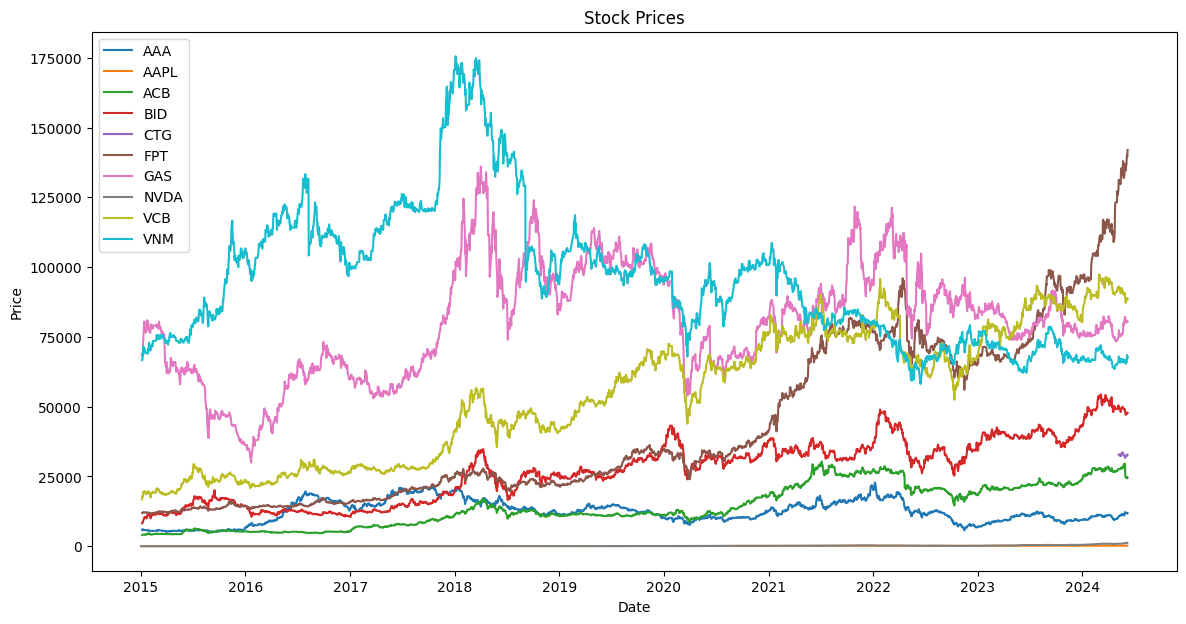

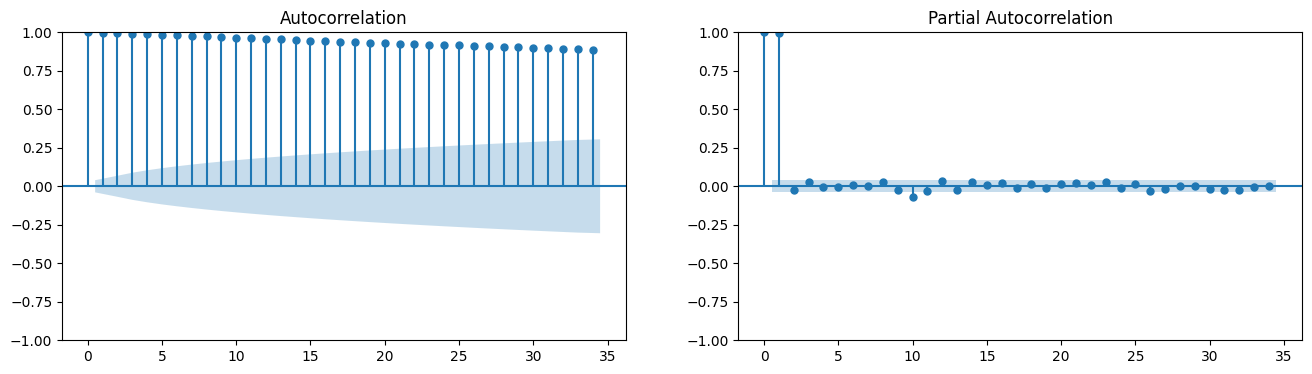

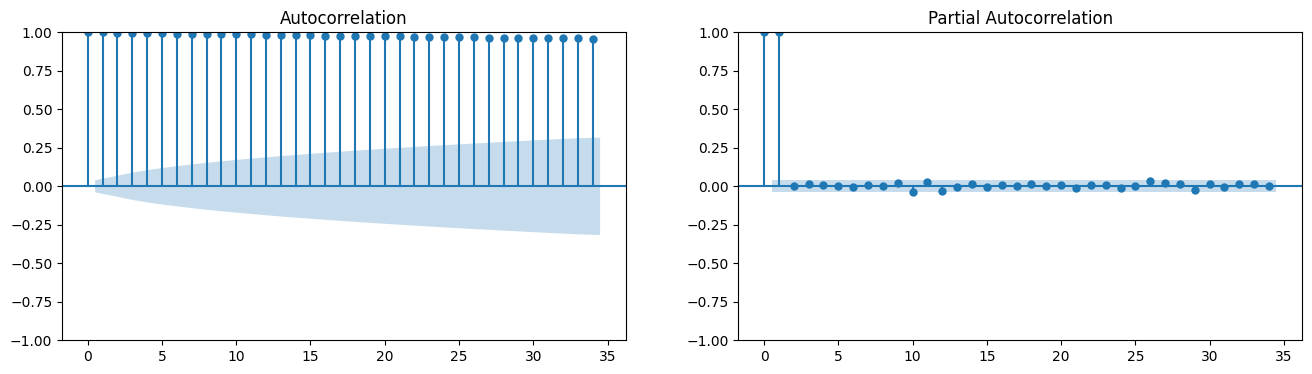

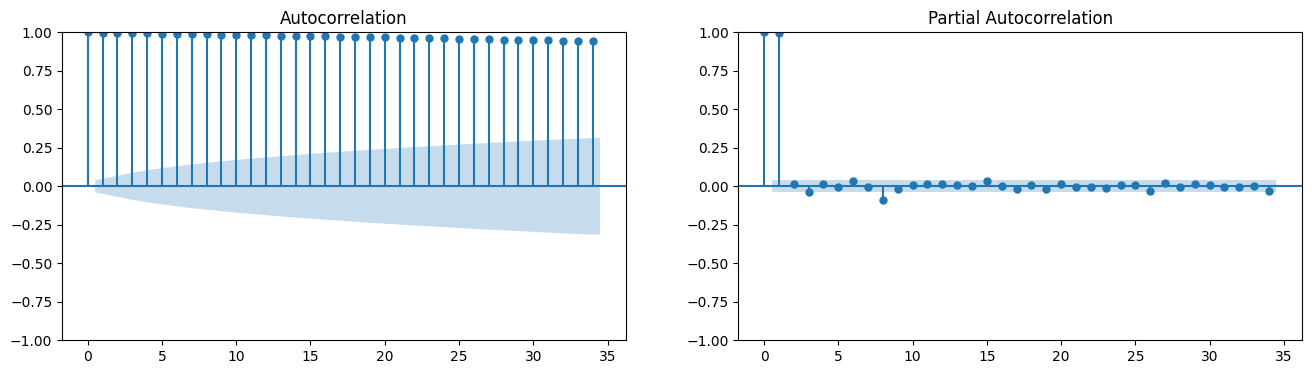

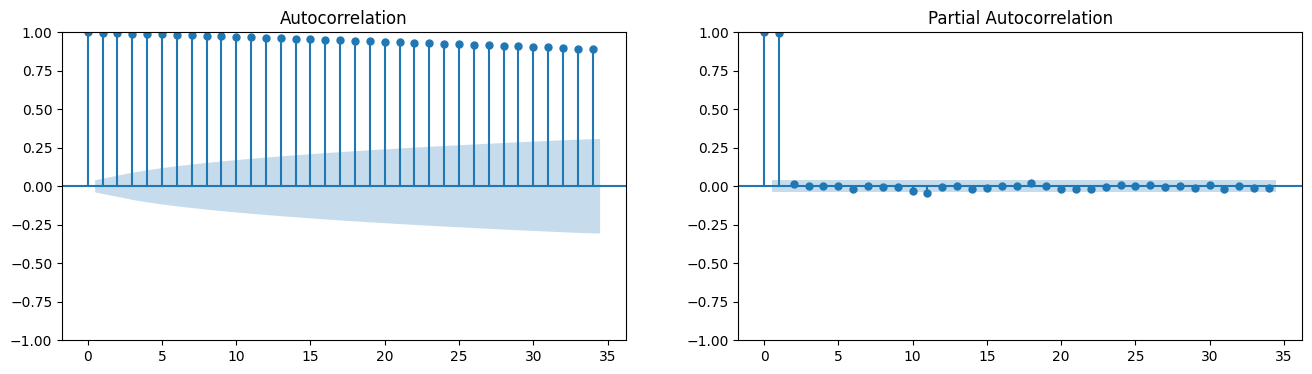

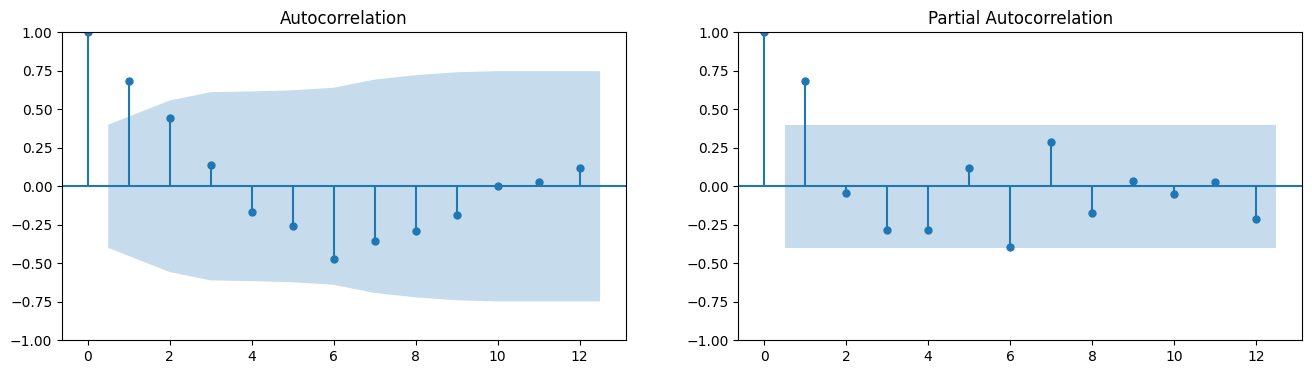

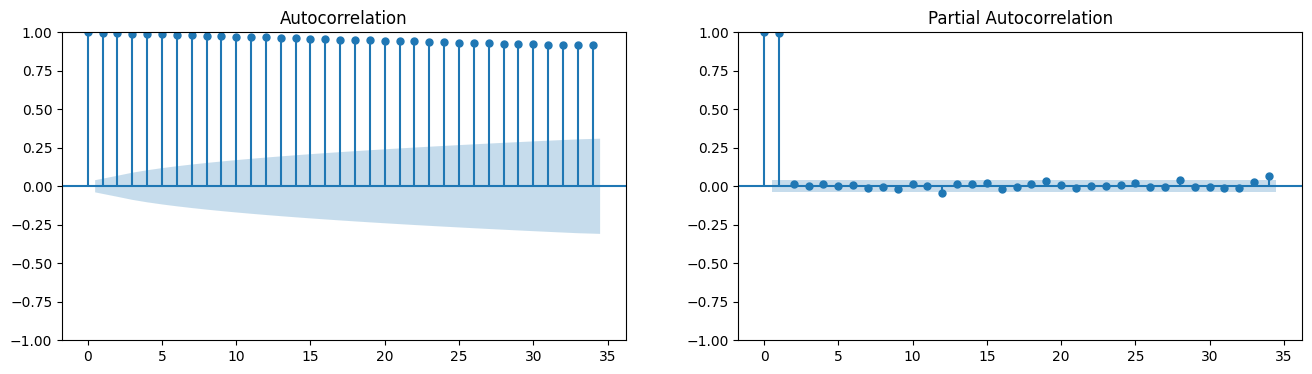

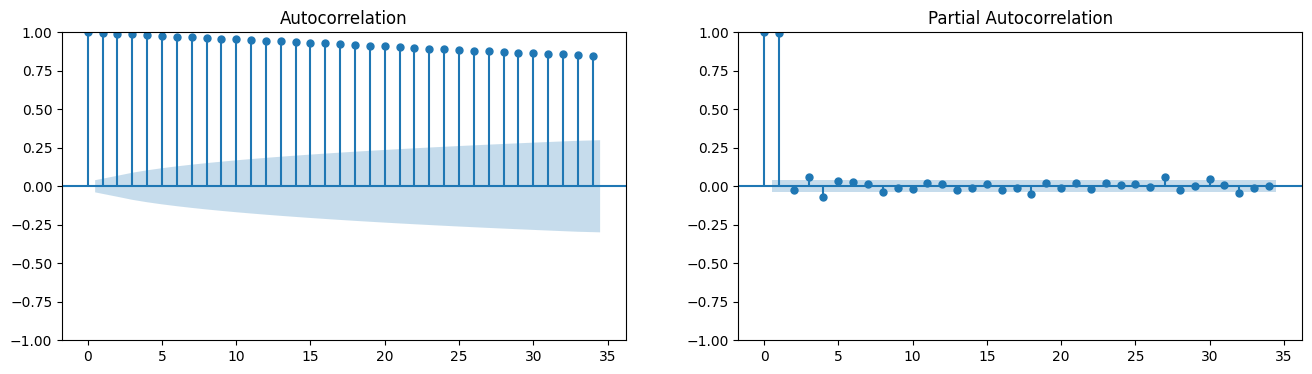

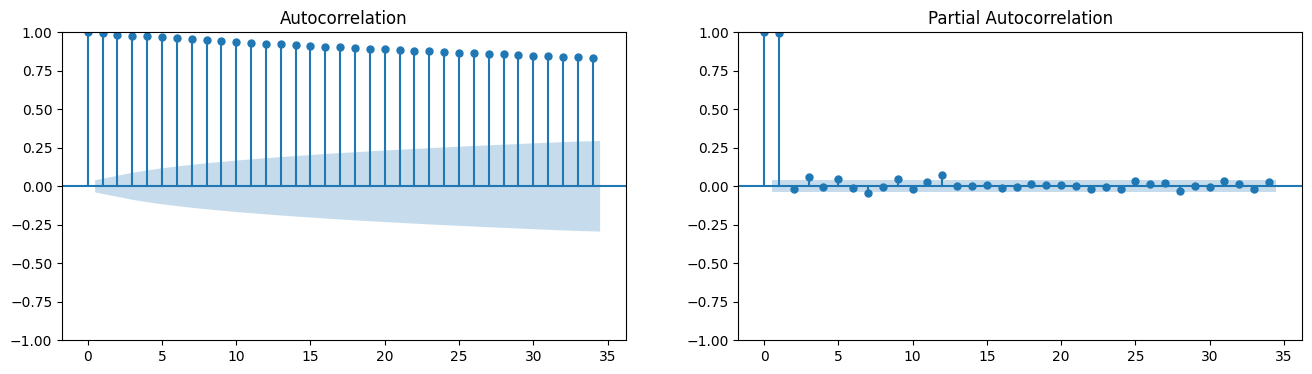

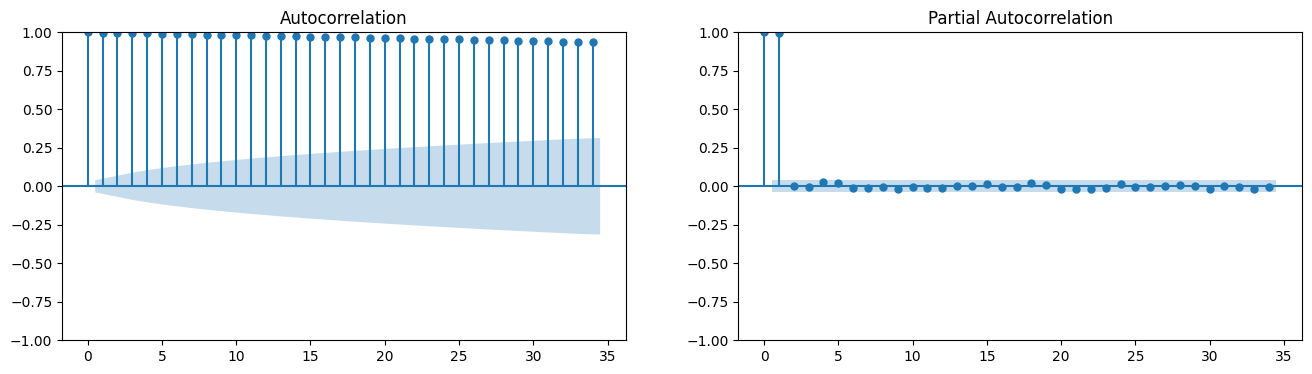

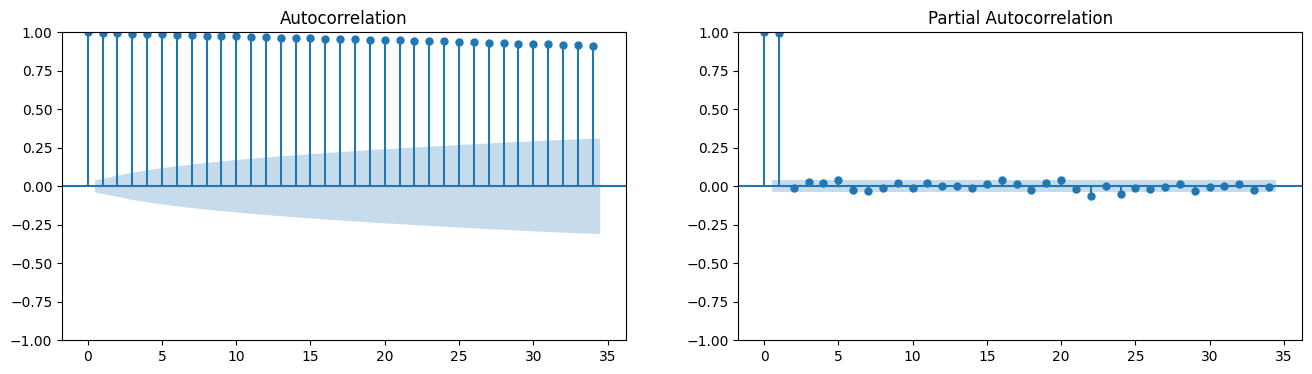

In [9]:
# Basic descriptive statistics
print(aaa_data.describe())
print(aapl_data.describe())
print(acb_data.describe())
print(bid_data.describe())
print(ctg_data.describe())
print(fpt_data.describe())
print(gas_data.describe())
print(nvda_data.describe())
print(vcb_data.describe())
print(vnm_data.describe())

# Plotting stock prices
plt.figure(figsize=(14, 7))
plt.plot(aaa_data.index, aaa_data['Price'], label='AAA')
plt.plot(aapl_data.index, aapl_data['Price'], label='AAPL')
plt.plot(acb_data.index, acb_data['Price'], label='ACB')
plt.plot(bid_data.index, bid_data['Price'], label='BID')
plt.plot(ctg_data.index, ctg_data['Price'], label='CTG')
plt.plot(fpt_data.index, fpt_data['Price'], label='FPT')
plt.plot(gas_data.index, gas_data['Price'], label='GAS')
plt.plot(nvda_data.index, nvda_data['Price'], label='NVDA')
plt.plot(vcb_data.index, vcb_data['Price'], label='VCB')
plt.plot(vnm_data.index, vnm_data['Price'], label='VNM')
plt.title('Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plotting ACF and PACF for AAA
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(aaa_data['Price'], ax=axes[0])
plot_pacf(aaa_data['Price'], ax=axes[1])
plt.show()

# Plotting ACF and PACF for AAPL
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(aapl_data['Price'], ax=axes[0])
plot_pacf(aapl_data['Price'], ax=axes[1])
plt.show()

# Plotting ACF and PACF for ACB
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(acb_data['Price'], ax=axes[0])
plot_pacf(acb_data['Price'], ax=axes[1])
plt.show()


# Plotting ACF and PACF for BID
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(bid_data['Price'], ax=axes[0])
plot_pacf(bid_data['Price'], ax=axes[1])
plt.show()

# Plotting ACF and PACF for ACB
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(ctg_data['Price'], ax=axes[0])
plot_pacf(ctg_data['Price'], ax=axes[1])
plt.show()

# Plotting ACF and PACF for ACB
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(fpt_data['Price'], ax=axes[0])
plot_pacf(fpt_data['Price'], ax=axes[1])
plt.show()

# Plotting ACF and PACF for AAPL
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(gas_data['Price'], ax=axes[0])
plot_pacf(gas_data['Price'], ax=axes[1])
plt.show()

# Plotting ACF and PACF for AAPL
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(nvda_data['Price'], ax=axes[0])
plot_pacf(nvda_data['Price'], ax=axes[1])
plt.show()

# Plotting ACF and PACF for AAPL
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(vcb_data['Price'], ax=axes[0])
plot_pacf(vcb_data['Price'], ax=axes[1])
plt.show()

# Plotting ACF and PACF for AAPL
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(vnm_data['Price'], ax=axes[0])
plot_pacf(vnm_data['Price'], ax=axes[1])
plt.show()



In [10]:
# Function to perform ADF test
def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis, data is stationary.")
    else:
        print("Weak evidence against the null hypothesis, data is non-stationary.")

# Function to apply differencing to make data stationary
def make_stationary(data):
    data_diff = data.diff().dropna()
    return data_diff

# Perform ADF test before differencing
print("AAA Stationarity Check Before Differencing")
adf_test(aaa_data['Price'])
print("AAPL Stationarity Check Before Differencing")
adf_test(aapl_data['Price'])
print("\nACB Stationarity Check Before Differencing")
adf_test(acb_data['Price'])
print("\nBID Stationarity Check Before Differencing")
adf_test(bid_data['Price'])
print("CTG Stationarity Check Before Differencing")
adf_test(ctg_data['Price'])
print("\nFPT Stationarity Check Before Differencing")
adf_test(fpt_data['Price'])
print("GAS Stationarity Check Before Differencing")
adf_test(gas_data['Price'])
print("\nNVDA Stationarity Check Before Differencing")
adf_test(nvda_data['Price'])
print("VCB Stationarity Check Before Differencing")
adf_test(vcb_data['Price'])
print("\nVNM Stationarity Check Before Differencing")
adf_test(vnm_data['Price'])

# Apply differencing if necessary
if adfuller(aaa_data['Price'])[1] > 0.05:
    aaa_data_diff = make_stationary(aaa_data['Price'])
else:
    aaa_data_diff = aaa_data['Price']

if adfuller(aapl_data['Price'])[1] > 0.05:
    aapl_data_diff = make_stationary(aapl_data['Price'])
else:
    aapl_data_diff = aapl_data['Price']

if adfuller(acb_data['Price'])[1] > 0.05:
    acb_data_diff = make_stationary(acb_data['Price'])
else:
    acb_data_diff = acb_data['Price']

if adfuller(bid_data['Price'])[1] > 0.05:
    bid_data_diff = make_stationary(bid_data['Price'])
else:
    bid_data_diff = bid_data['Price']

if adfuller(ctg_data['Price'])[1] > 0.05:
    ctg_data_diff = make_stationary(ctg_data['Price'])
else:
    ctg_data_diff = ctg_data['Price']

if adfuller(fpt_data['Price'])[1] > 0.05:
    fpt_data_diff = make_stationary(fpt_data['Price'])
else:
    fpt_data_diff = fpt_data['Price']

if adfuller(gas_data['Price'])[1] > 0.05:
    gas_data_diff = make_stationary(gas_data['Price'])
else:
    gas_data_diff = gas_data['Price']

if adfuller(nvda_data['Price'])[1] > 0.05:
    nvda_data_diff = make_stationary(nvda_data['Price'])
else:
    nvda_data_diff = nvda_data['Price']

if adfuller(vcb_data['Price'])[1] > 0.05:
    vcb_data_diff = make_stationary(vcb_data['Price'])
else:
    vcb_data_diff = vcb_data['Price']

if adfuller(vnm_data['Price'])[1] > 0.05:
    vnm_data_diff = make_stationary(vnm_data['Price'])
else:
    vnm_data_diff = vnm_data['Price']

# Perform ADF test after differencing
print("\nAAA Stationarity Check After Differencing")
adf_test(aaa_data_diff)
print("\nAAPL Stationarity Check After Differencing")
adf_test(aapl_data_diff)
print("\nACB Stationarity Check After Differencing")
adf_test(acb_data_diff)
print("\nBID Stationarity Check After Differencing")
adf_test(bid_data_diff)
print("\nCTG Stationarity Check After Differencing")
adf_test(ctg_data_diff)
print("\nFPT Stationarity Check After Differencing")
adf_test(fpt_data_diff)
print("\nGAS Stationarity Check After Differencing")
adf_test(gas_data_diff)
print("\nNVDA Stationarity Check After Differencing")
adf_test(nvda_data_diff)
print("\nVCB Stationarity Check After Differencing")
adf_test(vcb_data_diff)
print("\nVNM Stationarity Check After Differencing")
adf_test(vnm_data_diff)


AAA Stationarity Check Before Differencing
ADF Statistic: -2.326394986023713
p-value: 0.16359630736215441
Weak evidence against the null hypothesis, data is non-stationary.
AAPL Stationarity Check Before Differencing
ADF Statistic: 0.0014364690592032193
p-value: 0.958650719949072
Weak evidence against the null hypothesis, data is non-stationary.

ACB Stationarity Check Before Differencing
ADF Statistic: -0.9627193657288606
p-value: 0.7666176337070777
Weak evidence against the null hypothesis, data is non-stationary.

BID Stationarity Check Before Differencing
ADF Statistic: -1.4261793977589385
p-value: 0.5696630445665075
Weak evidence against the null hypothesis, data is non-stationary.
CTG Stationarity Check Before Differencing
ADF Statistic: -1.1746860761474396
p-value: 0.6843892493597481
Weak evidence against the null hypothesis, data is non-stationary.

FPT Stationarity Check Before Differencing
ADF Statistic: 3.0750373241150815
p-value: 1.0
Weak evidence against the null hypothesi

In [11]:
# Define the function to split data
def split_data(data_diff, data):
    train_size = int(len(data_diff) * 0.8)
    train_arima = data_diff.iloc[:train_size]
    test_arima = data_diff.iloc[train_size:]
    return train_arima, test_arima

# Split the data for each stock
train_aaa_arima, test_aaa_arima = split_data(aaa_data_diff, aaa_data)
train_aapl_arima, test_aapl_arima = split_data(aapl_data_diff, aapl_data)
train_acb_arima, test_acb_arima = split_data(acb_data_diff, acb_data)
train_bid_arima, test_bid_arima = split_data(bid_data_diff, bid_data)
train_ctg_arima, test_ctg_arima = split_data(ctg_data_diff, ctg_data)
train_fpt_arima, test_fpt_arima = split_data(fpt_data_diff, fpt_data)
train_gas_arima, test_gas_arima = split_data(gas_data_diff, gas_data)
train_nvda_arima, test_nvda_arima = split_data(nvda_data_diff, nvda_data)
train_vcb_arima, test_vcb_arima = split_data(vcb_data_diff, vcb_data)
train_vnm_arima, test_vnm_arima = split_data(vnm_data_diff, vnm_data)

# Define the ARIMA parameters
order = (2, 1, 0)

# Function to perform walk-forward validation
def walk_forward_arima(train, test, order):
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
    return predictions

# Perform walk-forward validation for each stock
pred_aaa_arima = walk_forward_arima(train_aaa_arima, test_aaa_arima, order)
pred_aapl_arima = walk_forward_arima(train_aapl_arima, test_aapl_arima, order)
pred_acb_arima = walk_forward_arima(train_acb_arima, test_acb_arima, order)
pred_bid_arima = walk_forward_arima(train_bid_arima, test_bid_arima, order)
pred_ctg_arima = walk_forward_arima(train_ctg_arima, test_ctg_arima, order)
pred_fpt_arima = walk_forward_arima(train_fpt_arima, test_fpt_arima, order)
pred_gas_arima = walk_forward_arima(train_gas_arima, test_gas_arima, order)
pred_nvda_arima = walk_forward_arima(train_nvda_arima, test_nvda_arima, order)
pred_vcb_arima = walk_forward_arima(train_vcb_arima, test_vcb_arima, order)
pred_vnm_arima = walk_forward_arima(train_vnm_arima, test_vnm_arima, order)

# Convert predictions to Pandas Series for easier plotting and evaluation
pred_aaa_arima = pd.Series(pred_aaa_arima, index=test_aaa_arima.index)
pred_aapl_arima = pd.Series(pred_aapl_arima, index=test_aapl_arima.index)
pred_acb_arima = pd.Series(pred_acb_arima, index=test_acb_arima.index)
pred_bid_arima = pd.Series(pred_bid_arima, index=test_bid_arima.index)
pred_ctg_arima = pd.Series(pred_ctg_arima, index=test_ctg_arima.index)
pred_fpt_arima = pd.Series(pred_fpt_arima, index=test_fpt_arima.index)
pred_gas_arima = pd.Series(pred_gas_arima, index=test_gas_arima.index)
pred_nvda_arima = pd.Series(pred_nvda_arima, index=test_nvda_arima.index)
pred_vcb_arima = pd.Series(pred_vcb_arima, index=test_vcb_arima.index)
pred_vnm_arima = pd.Series(pred_vnm_arima, index=test_vnm_arima.index)

# Transform predictions back to the original scale if differenced
def transform_back(data, train_arima, pred_arima):
    if adfuller(data['Price'])[1] > 0.05:
        last_train_price = data['Price'].loc[train_arima.index[-1]]
        pred_arima = last_train_price + pred_arima.cumsum()
    return pred_arima

pred_aaa_arima = transform_back(aaa_data, train_aaa_arima, pred_aaa_arima)
pred_aapl_arima = transform_back(aapl_data, train_aapl_arima, pred_aapl_arima)
pred_acb_arima = transform_back(acb_data, train_acb_arima, pred_acb_arima)
pred_bid_arima = transform_back(bid_data, train_bid_arima, pred_bid_arima)
pred_ctg_arima = transform_back(ctg_data, train_ctg_arima, pred_ctg_arima)
pred_fpt_arima = transform_back(fpt_data, train_fpt_arima, pred_fpt_arima)
pred_gas_arima = transform_back(gas_data, train_gas_arima, pred_gas_arima)
pred_nvda_arima = transform_back(nvda_data, train_nvda_arima, pred_nvda_arima)
pred_vcb_arima = transform_back(vcb_data, train_vcb_arima, pred_vcb_arima)
pred_vnm_arima = transform_back(vnm_data, train_vnm_arima, pred_vnm_arima)

# Function to align actual and predicted values and calculate evaluation metrics
def evaluate_predictions(actual, pred, stock_name):
    actual, pred = actual.align(pred, join='inner')
    if len(actual) == 0 or len(pred) == 0:
        print(f"Error: One of the series is empty after alignment for {stock_name}. Please check the data.")
    else:
        r2 = r2_score(actual, pred)
        mse = mean_squared_error(actual, pred)
        mape = mean_absolute_percentage_error(actual, pred)
        rmse = np.sqrt(mse)
        
        # Custom accuracy calculation
        accuracy_threshold = 0.05  # Define threshold for accuracy within 5%
        accuracy = np.mean(np.abs((actual - pred) / actual) < accuracy_threshold)
        
        print(f'ARIMA {stock_name} - R^2: {r2}, MAPE: {mape}, RMSE: {rmse}, MSE: {mse}, Accuracy: {accuracy}')

# Evaluate predictions for each stock
evaluate_predictions(aaa_data['Price']['2022-03-01':], pred_aaa_arima, 'aaa')
evaluate_predictions(aapl_data['Price']['2022-03-01':], pred_aapl_arima, 'aapl')
evaluate_predictions(acb_data['Price']['2022-03-01':], pred_acb_arima, 'acb')
evaluate_predictions(bid_data['Price']['2022-03-01':], pred_bid_arima, 'bid')
evaluate_predictions(ctg_data['Price']['2022-03-01':], pred_ctg_arima, 'ctg')
evaluate_predictions(fpt_data['Price']['2022-03-01':], pred_fpt_arima, 'fpt')
evaluate_predictions(gas_data['Price']['2022-03-01':], pred_gas_arima, 'gas')
evaluate_predictions(nvda_data['Price']['2022-03-01':], pred_nvda_arima, 'nvda')
evaluate_predictions(vcb_data['Price']['2022-03-01':], pred_vcb_arima, 'vcb')
evaluate_predictions(vnm_data['Price']['2022-03-01':], pred_vnm_arima, 'vnm')


ARIMA aaa - R^2: 0.9697623263710945, MAPE: 0.020737211022552954, RMSE: 274.5252679155771, MSE: 75364.1227241194, Accuracy: 0.9105691056910569
ARIMA aapl - R^2: 0.9526249739570227, MAPE: 0.01879742983633218, RMSE: 3.9726268463833154, MSE: 15.781764060605447, Accuracy: 0.9451219512195121
ARIMA acb - R^2: 0.9673829953548357, MAPE: 0.019079631640772057, RMSE: 559.2965059925621, MSE: 312812.58161548804, Accuracy: 0.9552845528455285
ARIMA bid - R^2: 0.9714387722402191, MAPE: 0.021988799587152972, RMSE: 1070.02869944123, MSE: 1144961.41762789, Accuracy: 0.9329268292682927
ARIMA ctg - R^2: -14.010826480628936, MAPE: 0.011403908972816857, RMSE: 513.9946945826088, MSE: 264190.5460590693, Accuracy: 1.0
ARIMA fpt - R^2: 0.9882838041553899, MAPE: 0.02268970690618625, RMSE: 2171.237789347083, MSE: 4714273.537888808, Accuracy: 0.9552845528455285
ARIMA gas - R^2: 0.5943671154601247, MAPE: 0.03942734567621603, RMSE: 3480.6016274545136, MSE: 12114587.689039009, Accuracy: 0.7784552845528455
ARIMA nvda - 

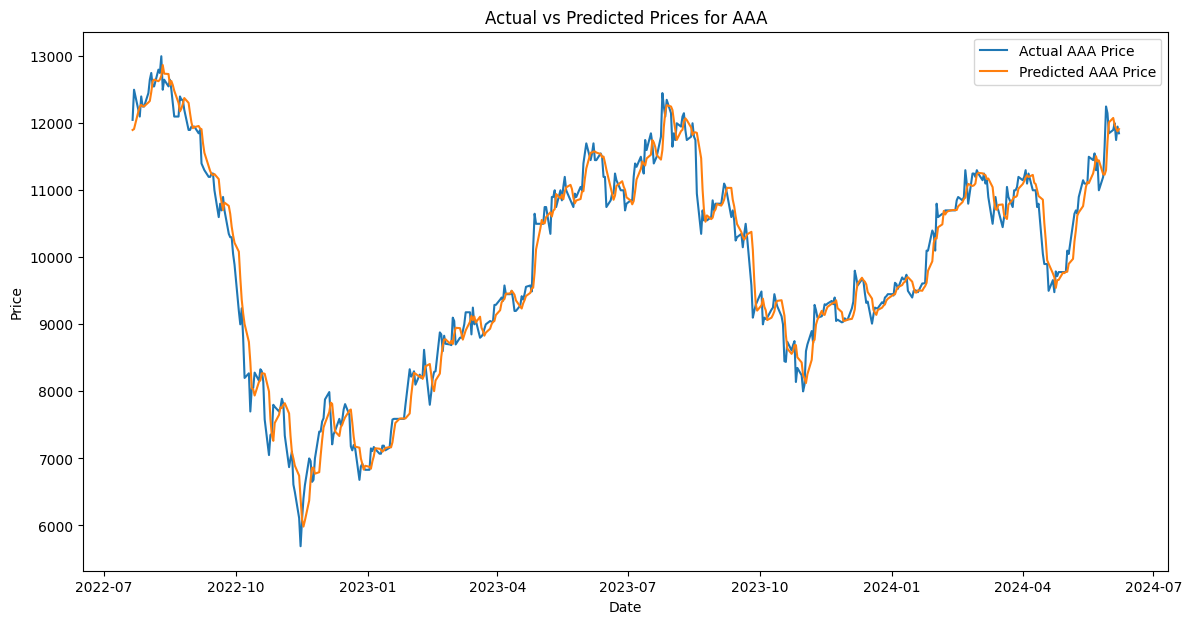

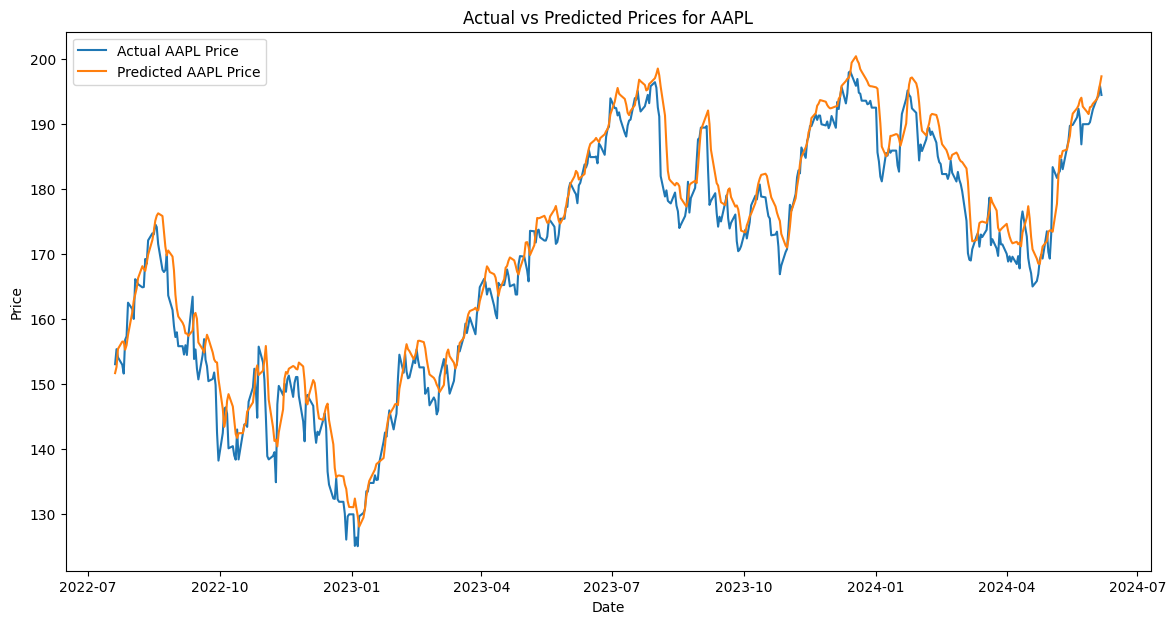

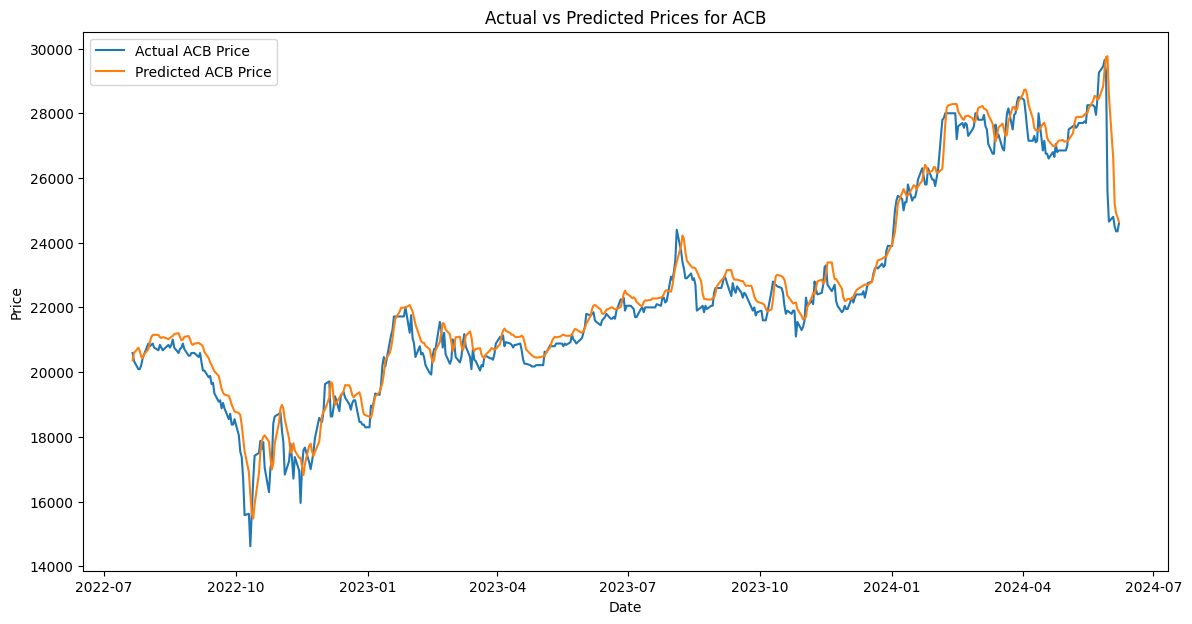

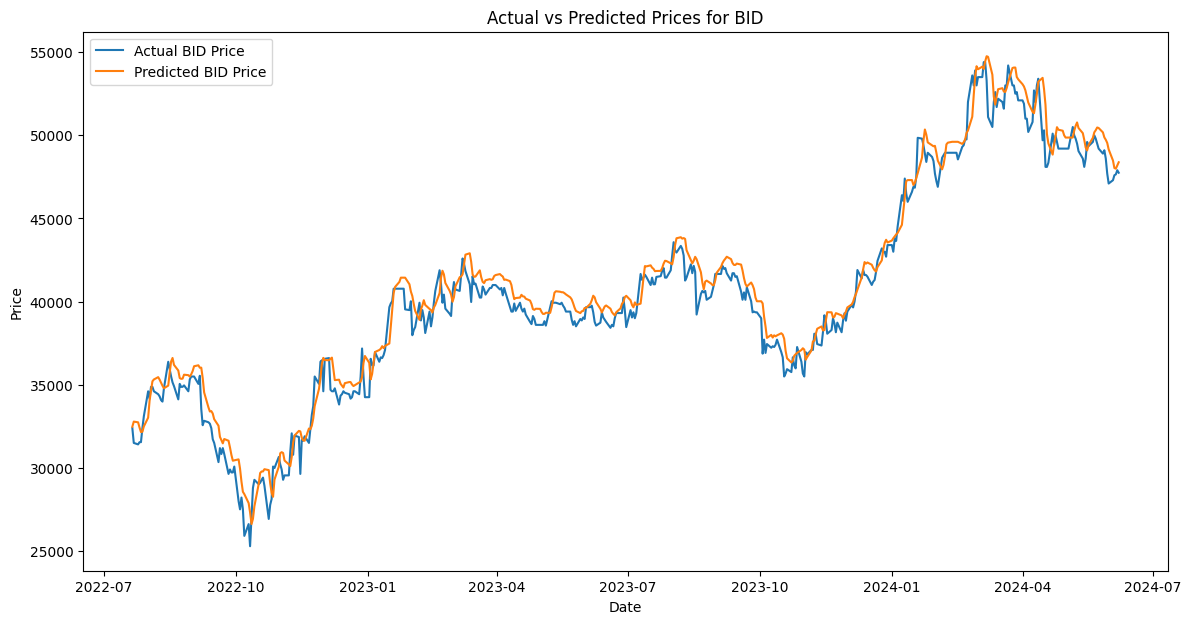

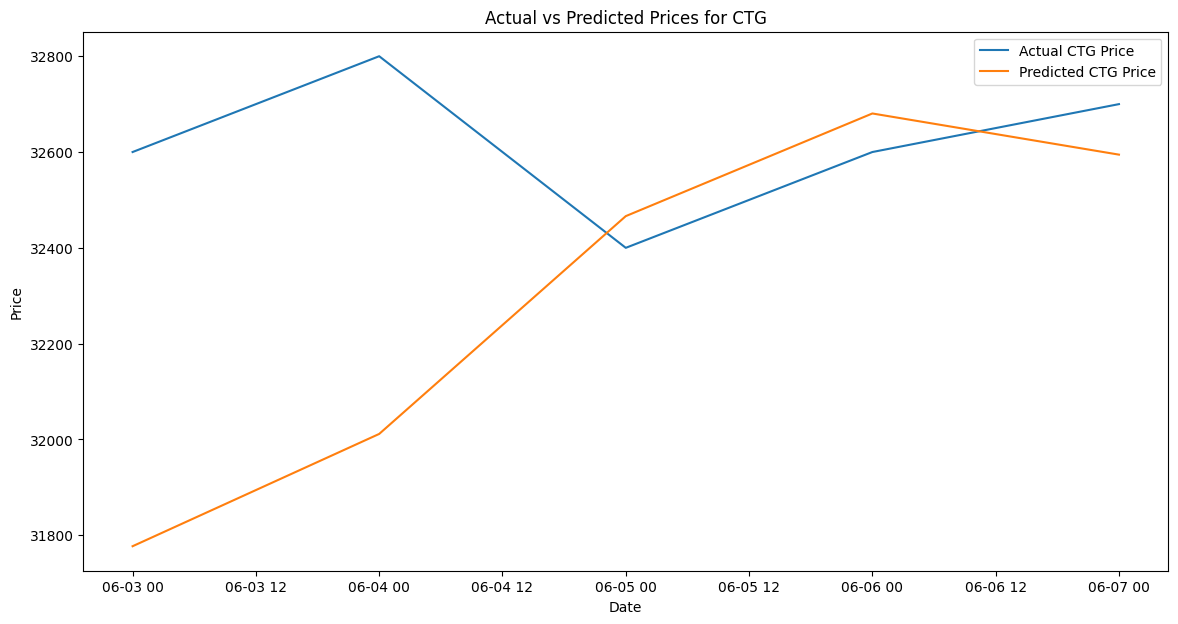

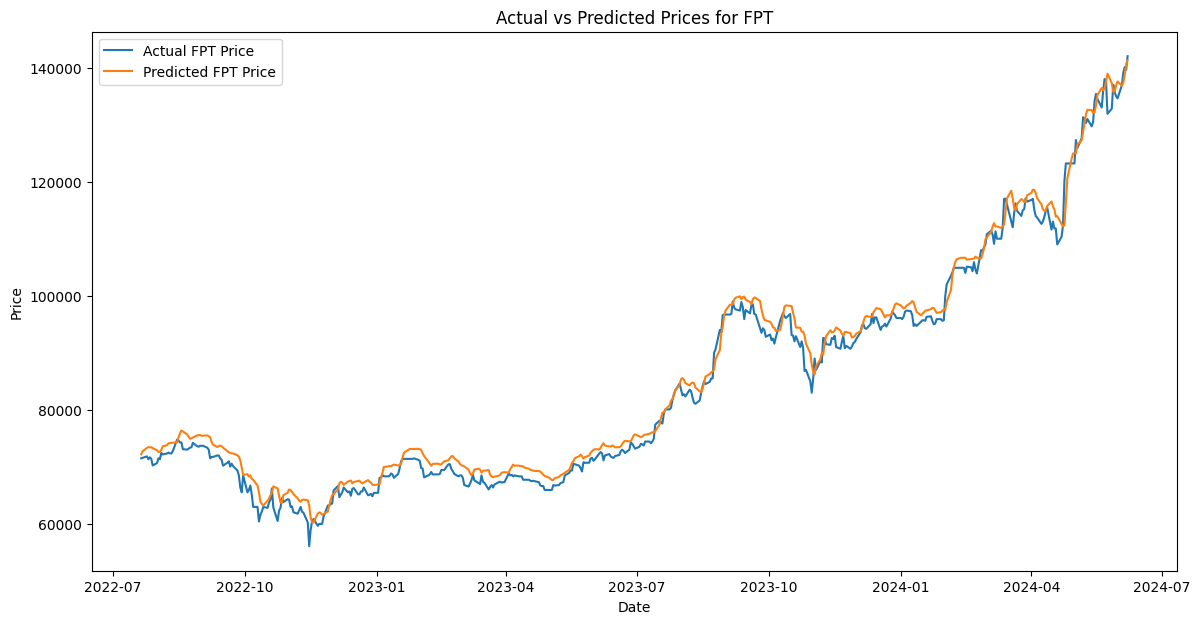

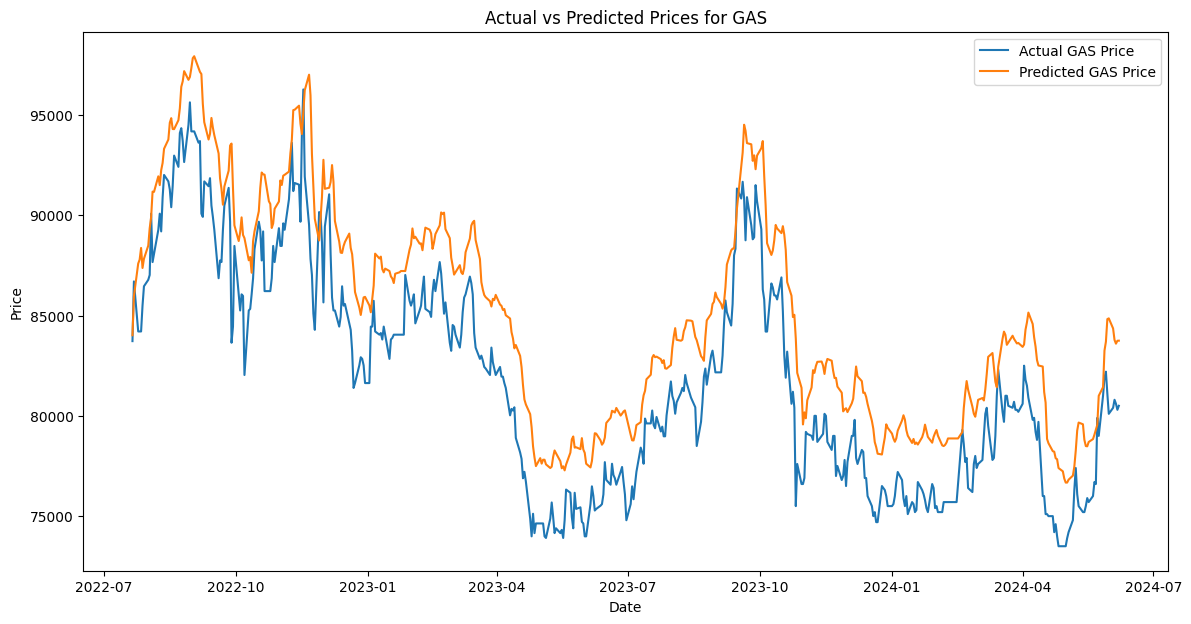

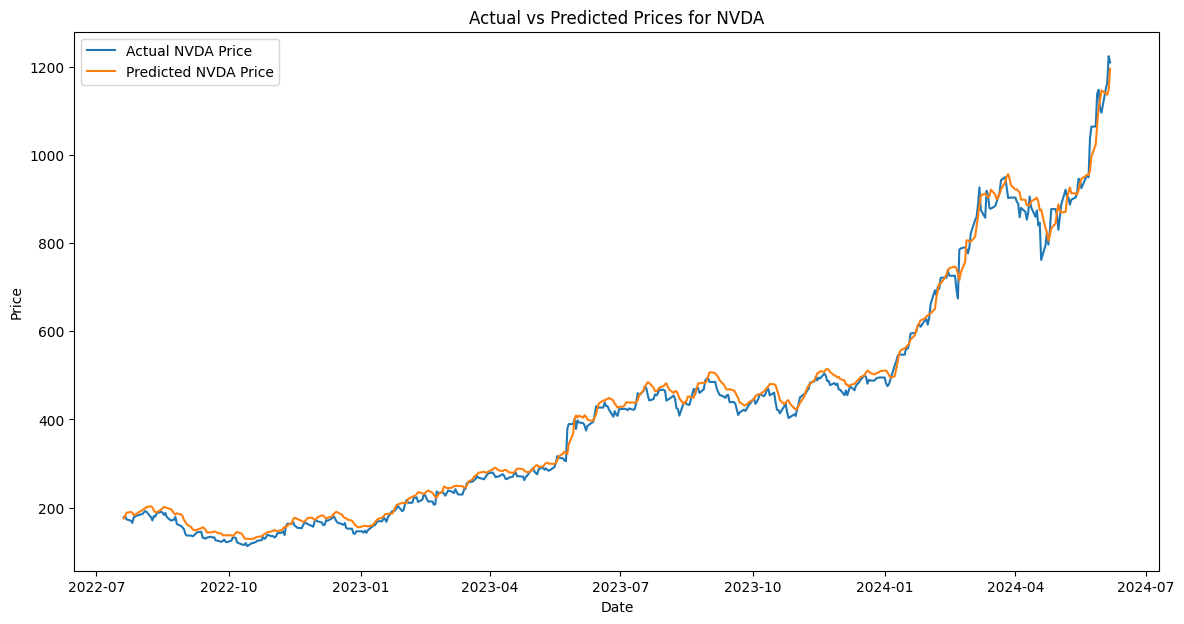

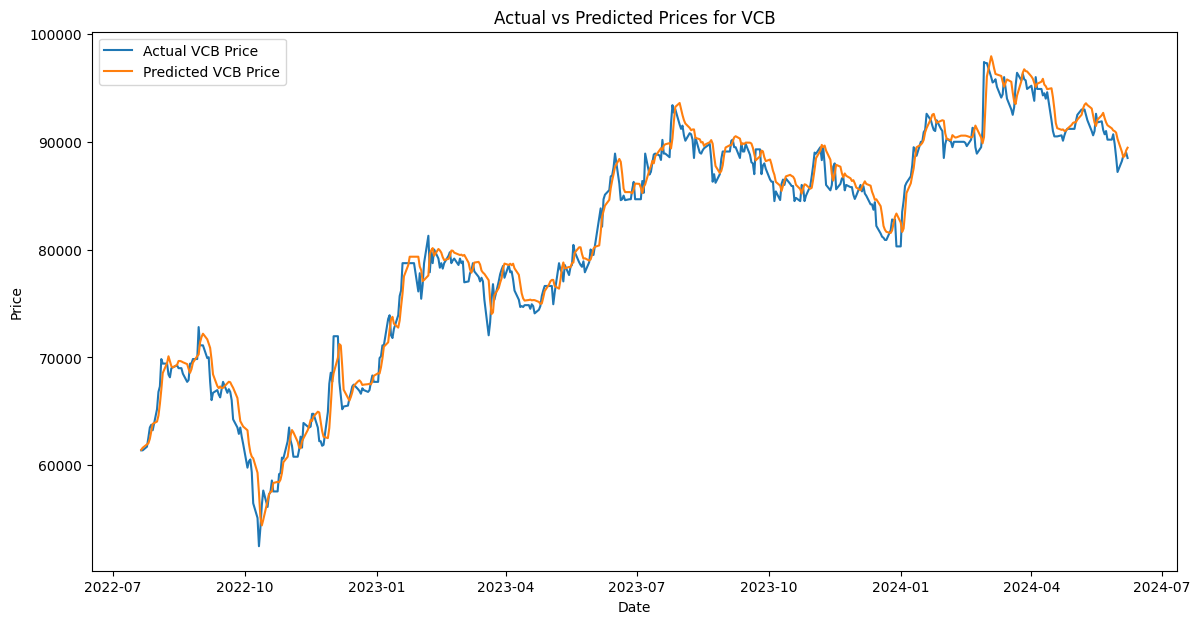

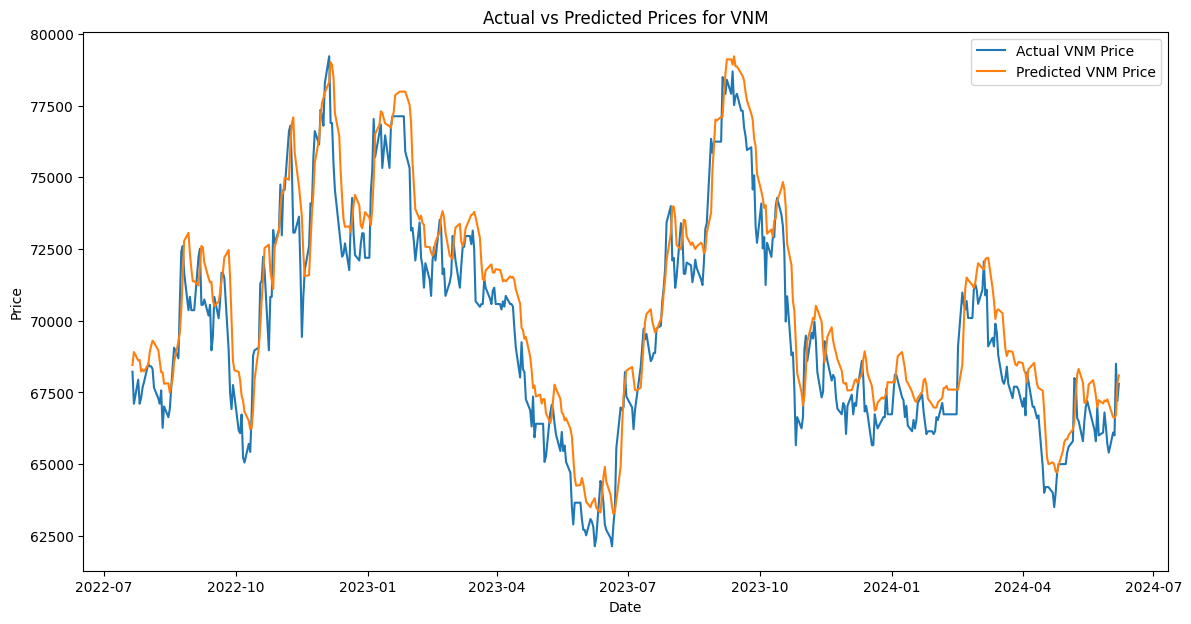

In [12]:
# Plotting actual vs predicted prices for each stock
def plot_actual_vs_predicted(stock_name, actual, predicted):
    plt.figure(figsize=(14, 7))
    plt.plot(actual, label=f'Actual {stock_name} Price')
    plt.plot(predicted, label=f'Predicted {stock_name} Price')
    plt.title(f'Actual vs Predicted Prices for {stock_name}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

plot_actual_vs_predicted('AAA', aaa_data['Price'].loc[test_aaa_arima.index], pred_aaa_arima)
plot_actual_vs_predicted('AAPL', aapl_data['Price'].loc[test_aapl_arima.index], pred_aapl_arima)
plot_actual_vs_predicted('ACB', acb_data['Price'].loc[test_acb_arima.index], pred_acb_arima)
plot_actual_vs_predicted('BID', bid_data['Price'].loc[test_bid_arima.index], pred_bid_arima)
plot_actual_vs_predicted('CTG', ctg_data['Price'].loc[test_ctg_arima.index], pred_ctg_arima)
plot_actual_vs_predicted('FPT', fpt_data['Price'].loc[test_fpt_arima.index], pred_fpt_arima)
plot_actual_vs_predicted('GAS', gas_data['Price'].loc[test_gas_arima.index], pred_gas_arima)
plot_actual_vs_predicted('NVDA', nvda_data['Price'].loc[test_nvda_arima.index], pred_nvda_arima)
plot_actual_vs_predicted('VCB', vcb_data['Price'].loc[test_vcb_arima.index], pred_vcb_arima)
plot_actual_vs_predicted('VNM', vnm_data['Price'].loc[test_vnm_arima.index], pred_vnm_arima)